In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import math

In [2]:
df_dataset_R = pd.read_csv("Milestone2_newData.csv")
goal = df_dataset_R[df_dataset_R['shot or goal'] == 'Goal'] 
nonGoal = df_dataset_R[df_dataset_R['shot or goal'] == 'Shot']
def get_direction(shot):
  """
  Return to the side of the net to which the shot was directed
  input:
  - shot: a row of dataframe; shape (m x 1)
  Output:
  - bool: True for the left side（defending zone is on right）, False for the right side
  """
  if (shot['period num'].item() % 2) == 1:
    if (shot['team name'] == shot['home name'] and shot['rinkSide'] == 'right') or (shot['team name'] == shot['away name'] and shot['rinkSide'] == 'left'):
      return True
    else:
      return False
  else:
    if (shot['team name'] == shot['home name'] and shot['rinkSide'] == 'right') or (shot['team name'] == shot['away name'] and shot['rinkSide'] == 'left'):
      return False
    else:
      return True


In [3]:
emptyNet=goal[goal['Empty Net'] == 0]
NonEmptyNet=goal[goal['Empty Net'] == 1]
emptyNet

,Unnamed: 0,period time,period time remaining,date time,period num,event Id,game ID,season,team ID,team name,...,shot type,strength,empty net,home name,away name,rinkSide,Distance from net,Angle from net,Is goal,Empty Net
5,5,03:09,16:51,2015-10-07 23:27:38,1,17,2015020001,20152016,8.0,Montréal Canadiens,...,Wrist Shot,Even,False,Toronto Maple Leafs,Montréal Canadiens,right,37.483330,43.919076,1,0
19,19,00:19,19:41,2015-10-08 00:21:09,2,604,2015020001,20152016,10.0,Toronto Maple Leafs,...,Deflected,Power Play,False,Toronto Maple Leafs,Montréal Canadiens,right,162.003086,89.646327,1,0
57,57,12:02,07:58,2015-10-08 01:36:33,3,633,2015020001,20152016,8.0,Montréal Canadiens,...,Snap Shot,Even,False,Toronto Maple Leafs,Montréal Canadiens,right,22.000000,90.000000,1,0
65,65,19:29,00:31,2015-10-08 01:55:21,3,759,2015020001,20152016,8.0,Montréal Canadiens,...,Wrist Shot,Even,True,Toronto Maple Leafs,Montréal Canadiens,right,37.215588,96.170175,1,0
67,67,01:43,18:17,2015-10-08 00:34:23,1,11,2015020002,20152016,3.0,New York Rangers,...,Wrist Shot,Even,False,Chicago Blackhawks,New York Rangers,right,22.135944,18.434949,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303241,303241,11:15,08:45,2019-04-07 02:58:45,1,47,2018021271,20182019,28.0,San Jose Sharks,...,Wrist Shot,Even,False,San Jose Sharks,Colorado Avalanche,left,7.280110,105.945396,1,0
303251,303251,01:29,18:31,2019-04-07 03:35:26,2,237,2018021271,20182019,21.0,Colorado Avalanche,...,Wrist Shot,Even,False,San Jose Sharks,Colorado Avalanche,left,8.246211,75.963757,1,0
303258,303258,06:57,13:03,2019-04-07 03:45:09,2,403,2018021271,20182019,28.0,San Jose Sharks,...,Backhand,Even,False,San Jose Sharks,Colorado Avalanche,left,24.515301,101.768289,1,0
303277,303277,05:38,14:22,2019-04-07 04:33:32,3,459,2018021271,20182019,28.0,San Jose Sharks,...,Wrist Shot,Even,False,San Jose Sharks,Colorado Avalanche,left,20.124612,63.434949,1,0


In [4]:
emptyNet['Distance from net']

5          37.483330
19        162.003086
57         22.000000
65         37.215588
67         22.135944
             ...    
303241      7.280110
303251      8.246211
303258     24.515301
303277     20.124612
303286     15.524175
Name: Distance from net, Length: 28026, dtype: float64

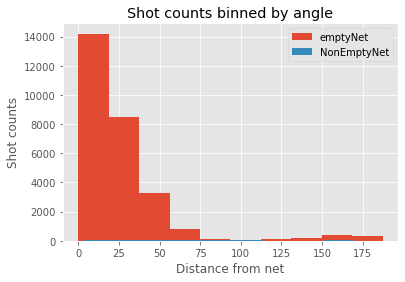

In [11]:
plt.hist(emptyNet['Distance from net'].tolist(),label = 'emptyNet')
plt.hist(NonEmptyNet['Distance from net'].tolist(),label = 'NonEmptyNet')
plt.xlabel('Distance from net')
plt.ylabel('Shot counts')
plt.title('Shot counts binned by angle')
plt.legend()
plt.show()